### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates
#!pip install mlxtend==0.23.1

In [ ]:
df = pd.read_excel('https://github.com/juanhubertl8010/dataset/raw/refs/heads/main/Supermarket-December-2017.xlsx')

df.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [ ]:
df.isnull().sum()

KD_SBR           3
TP_TRN           3
KDSUP       107657
KAS          12195
TRN_DK           3
             ...  
TP_ADJ        9413
USER             3
TANGGAL          3
JAM              3
LAMA_CRD    148452
Length: 61, dtype: int64

In [ ]:
df.describe()

,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,...,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,...,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,...,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,...,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,...,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,...,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,...,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,...,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


In [ ]:
df_cleaned = df

relevant_columns = ['ITEM',  'NO_BKT','KEL', 'QTY', 'JLH_TRANS', 'TANGGAL', 'JAM', 'USER']
if all(col in df_cleaned.columns for col in relevant_columns):
    df_cleaned = df_cleaned[relevant_columns]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_cleaned = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

df_cleaned.isnull().sum()

ITEM         0
NO_BKT       0
KEL          0
QTY          0
JLH_TRANS    0
TANGGAL      0
JAM          0
USER         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

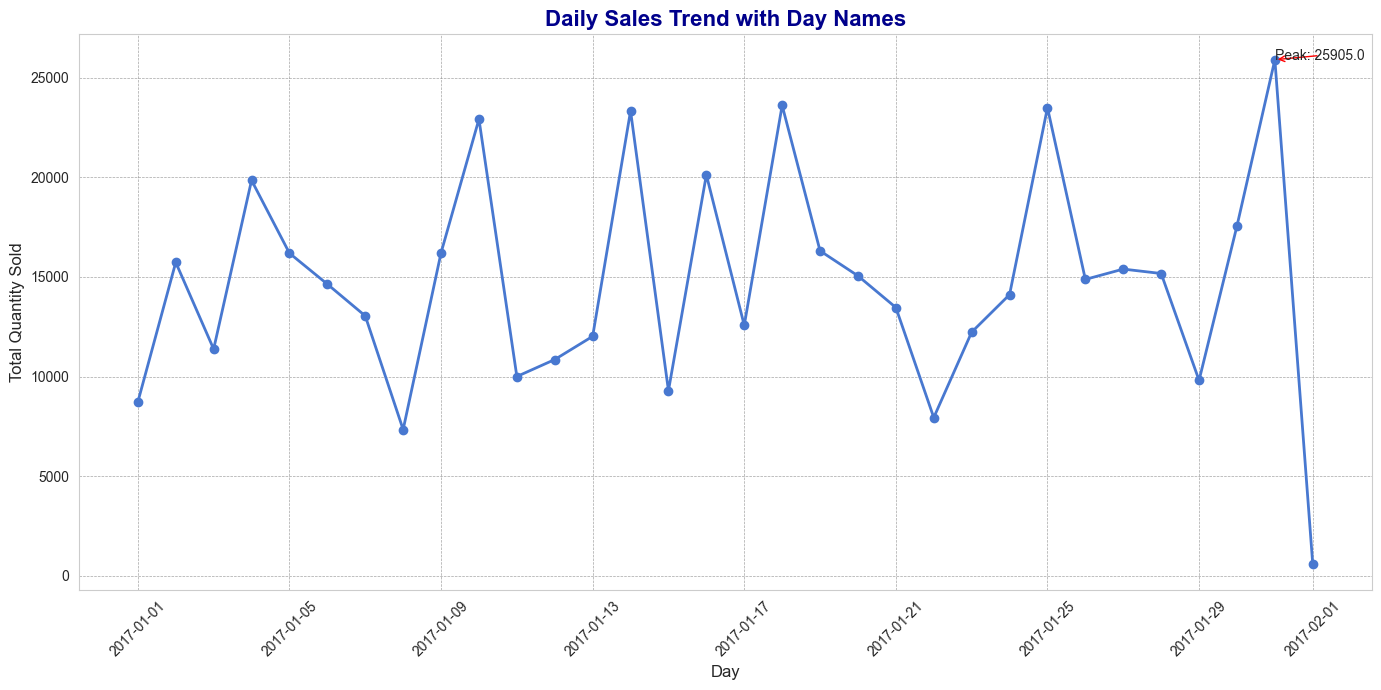

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df_cleaned['Day'] = pd.to_datetime(df_cleaned['TANGGAL'].dt.date)
df_cleaned['DayName'] = df_cleaned['TANGGAL'].dt.day_name()

daily_trend = df_cleaned.groupby(['Day', 'DayName'])['QTY'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_trend['Day'], daily_trend['QTY'],
         marker='o', linestyle='-', linewidth=2, color=sns.color_palette("muted")[0])

max_day = daily_trend.loc[daily_trend['QTY'].idxmax()]
plt.annotate(f"Peak: {max_day['QTY']}",
             xy=(max_day['Day'], max_day['QTY']),
             xytext=(max_day['Day'], max_day['QTY'] + 10),
             arrowprops=dict(arrowstyle="->", color='red'))

plt.title('Daily Sales Trend with Day Names', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.show()


C:\Users\Rangga R\AppData\Local\Temp\ipykernel_14660\2412312472.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='QTY', y='KEL', data=top_10_selling, palette='deep')


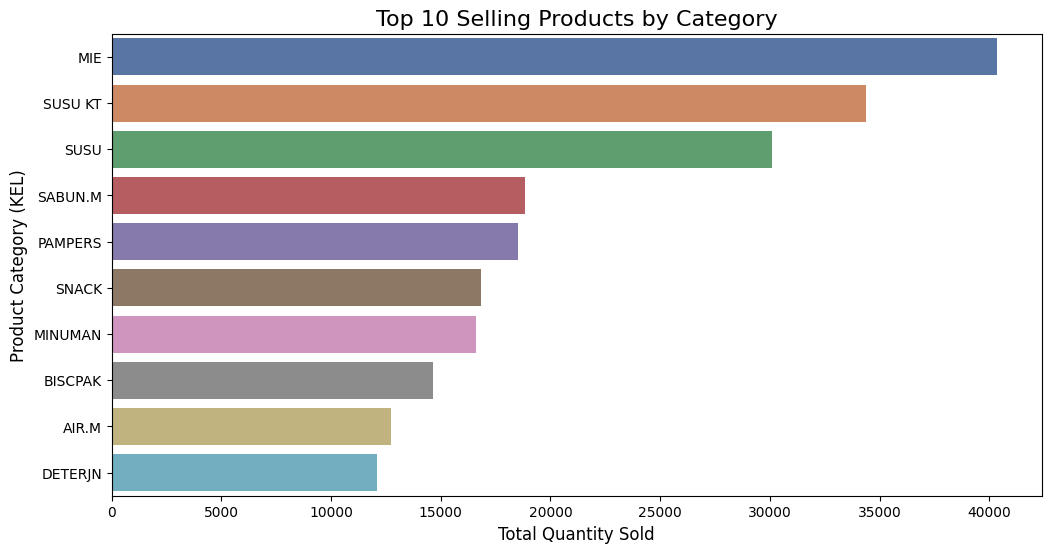

In [ ]:
# Visualization: Top 10 Selling Products (by 'KEL' column)

# Group by 'KEL' and sum the quantity sold (QTY)
top_selling = df_cleaned.groupby('KEL')['QTY'].sum().reset_index()

# Sort the products by total quantity sold in descending order
top_selling = top_selling.sort_values(by='QTY', ascending=False)

# Select the top 10 selling products
top_10_selling = top_selling.head(10)

# Create a barplot for the top 10 selling products
plt.figure(figsize=(12, 6))
sns.barplot(x='QTY', y='KEL', data=top_10_selling, palette='deep')

# Title and labels
plt.title('Top 10 Selling Products by Category', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Category (KEL)', fontsize=12)

# Show the plot
plt.show()

Apriori

In [ ]:
apriori_data = pd.crosstab(df_cleaned['NO_BKT'], df_cleaned['KEL'])
apriori_data.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_14660\4157563260.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
output = frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
output

C:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
1,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
2,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
3,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
4,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
5,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
6,(DETERJN),(SUSU KT),0.083607,0.166530,0.023997,0.287022,1.723545,0.010074,1.168998,0.458101
7,(SUSU KT),(DETERJN),0.166530,0.083607,0.023997,0.144100,1.723545,0.010074,1.070678,0.503678
8,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667
9,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064


**Optimalisasi Tata Letak Supermarket untuk Meningkatkan Penjualan Silang**  

1. **Kelompokkan Produk Pelengkap**  
   - **Kecantikan & Perawatan Pribadi:**  
     Produk: Shampoo, Sabun.M (Sabun Pria), P Gigi (Produk Perawatan Gigi).  
     Tindakan: Buat bagian khusus atau tampilan ujung rak untuk produk ini guna mendorong pelanggan membeli secara bersamaan.  
   - **Makanan Ringan:**  
     Produk: Snacks, BiscPak (Biskuit).  
     Tindakan: Tempatkan produk ini berdampingan di lorong makanan ringan dengan papan promosi seperti “Kombinasi Sempurna: Snack & BiscPak.”  

2. **Buat Bagian Bertema**  
   - **Keperluan Laundry:**  
     Produk: Deterjen, Pelembut, Mie, SUSU KT (Susu Khusus).  
     Tindakan: Rancang lorong bertema yang menggabungkan produk laundry dengan beberapa kebutuhan bahan makanan untuk meningkatkan ukuran keranjang belanja.  

3. **Manfaatkan Produk dengan Dukungan Tinggi untuk Promosi Silang**  
   - **Perawatan Ibu & Bayi:**  
     Produk: Pampers, P Gigi, Sabun.M.  
     Tindakan: Bangun bagian mencolok untuk produk dengan dukungan tinggi ini dan tawarkan paket diskon atau promosi jika dibeli bersamaan.  

4. **Optimalkan Penempatan Produk**  
   - **Integrasi Kategori Terkait:**  
     Contoh: Tempatkan Sabun.M di dekat Shampoo dan P Gigi untuk memudahkan pembelian multi-produk.  
     Snacks Dekat BiscPak: Dorong perilaku pembelian pelengkap dengan menempatkan produk ini berdekatan.  
   - **Tampilan Ujung Rak:**  
     Tampilkan asosiasi kuat seperti Shampoo, Sabun.M, dan P Gigi untuk menarik perhatian pelanggan dan meningkatkan penjualan gabungan.  

5. **Gunakan Papan Informasi dan Promosi**  
   - **Papan Informasi yang Jelas:**  
     Gunakan papan untuk menyoroti produk terkait, seperti “Beli Shampoo dan Hemat untuk P Gigi!” atau “Lengkapi Cucian Anda dengan Deterjen dan Pelembut.”  
   - **Kampanye Promosi:**  
     Terapkan diskon atau penawaran khusus saat pelanggan membeli produk yang berkaitan bersama, mendorong pembelian silang.  

6. **Tingkatkan Visibilitas di Area Lalu Lintas Tinggi**  
   - **Penempatan Produk Populer:**  
     Tempatkan produk dengan dukungan tinggi seperti SUSU KT dan Pampers di zona lalu lintas tinggi untuk memaksimalkan visibilitas dan pembelian impulsif.  
   - **Aksesibilitas Produk Pelengkap:**  
     Pastikan produk terkait mudah dijangkau satu sama lain, seperti menempatkan Mie di dekat Deterjen dan Pelembut.  

7. **Terapkan Tata Letak Rak Berbasis Data**  
   - **Penyesuaian Planogram:**  
     Perbarui pengaturan rak secara berkala berdasarkan data asosiasi yang berkembang untuk terus mengoptimalkan peluang penjualan silang.  
   - **Tata Letak Dinamis:**  
     Sesuaikan tata letak toko secara berkala untuk mencerminkan tren pembelian terkini dan wawasan asosiasi.  

8. **Manfaatkan Teknologi untuk Rekomendasi yang Dipersonalisasi**  
   - **Papan Digital & Kode QR:**  
     Gunakan tampilan digital untuk menyarankan produk terkait berdasarkan asosiasi populer, meningkatkan pengalaman berbelanja.  
   - **Integrasi Aplikasi Seluler:**  
     Masukkan aturan asosiasi ke dalam aplikasi seluler Anda untuk menyediakan daftar belanja dan promosi yang dipersonalisasi sesuai dengan perilaku pelanggan individu.